In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [10]:

df=pd.read_csv(r"C:\Users\arshi\Downloads\netflix_dataset (5).csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [14]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

## Taking count of Rating

In [17]:
x=df.groupby('rating').size().reset_index(name='Total Count')

In [23]:
x.sort_values('Total Count',ascending=False)

,rating,Total Count
8,TV-MA,2863
6,TV-14,1931
9,TV-PG,806
5,R,665
4,PG-13,386
10,TV-Y,280
11,TV-Y7,271
3,PG,247
7,TV-G,194
2,NR,84


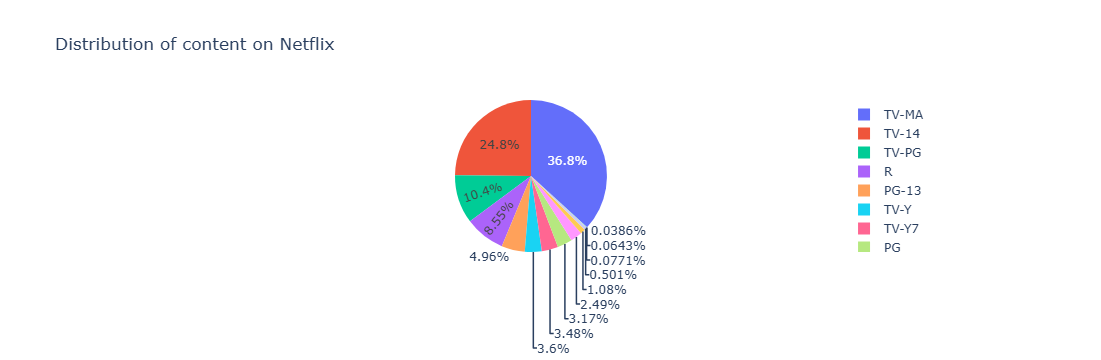

In [42]:

px.pie(x,values='Total Count',names='rating',title='Distribution of content on Netflix')


## Analyzing top 5 director

In [45]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [59]:
df['director']=df['director'].fillna('Name not specified')


In [61]:
director_list=df['director']
director_list=director_list.to_frame()
director_list

,director
0,Name not specified
1,Jorge Michel Grau
2,Gilbert Chan
3,Shane Acker
4,Robert Luketic
...,...
7782,Josef Fares
7783,Mozez Singh
7784,Name not specified
7785,Name not specified


In [63]:
director_list.columns=['Director']

In [65]:
director_list.nunique()

Director    4050
dtype: int64

In [73]:
directors=director_list.groupby('Director').size().reset_index(name='Total Count')
directors.sort_values('Total Count',ascending=False,inplace=True)


In [77]:
directors=directors[directors['Director']!='Name not specified']

In [79]:
top_5_directors=directors.head()
top_5_directors

,Director,Total Count
3079,"Raúl Campos, Jan Suter",18
2321,Marcus Raboy,16
1607,Jay Karas,14
624,Cathy Garcia-Molina,13
1604,Jay Chapman,12


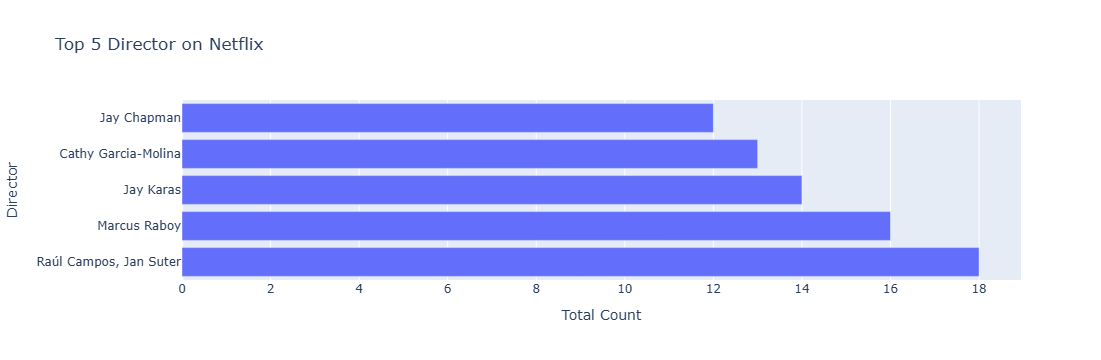

In [81]:
px.bar(top_5_directors,x='Total Count',y='Director',title='Top 5 Director on Netflix')

## Top 5 Actors

In [142]:
df['cast']=df['cast'].fillna("Actor Not Specified ")

In [144]:
cast_df=df['cast'].str.split(',',expand=True).stack()

In [146]:
cast_df=cast_df.to_frame()

In [148]:
cast_df.columns=['Actor']

In [150]:
cast_df=cast_df[cast_df['Actor']!='Actor Not Specified ']

In [152]:
cast_df.head()

Actor
0 0        João Miguel
  1   Bianca Comparato
  2       Michel Gomes
  3    Rodolfo Valente
  4    Vaneza Oliveira

In [154]:
Actors=cast_df.groupby('Actor').size().reset_index(name='Total Count')

In [156]:
Actors.sort_values('Total Count',inplace=True,ascending=False)

In [161]:
top_5_actors=Actors.head()

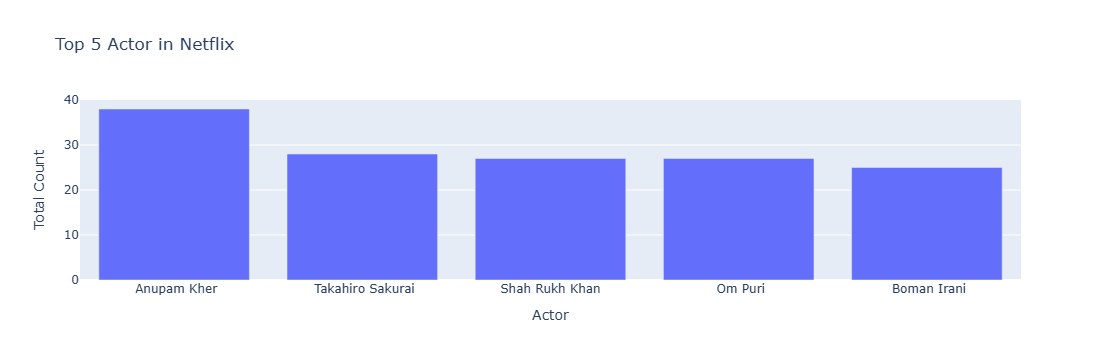

In [163]:
px.bar(top_5_actors,x='Actor',y='Total Count',title='Top 5 Actor in Netflix')

## Analysis Based on content produced on Years

In [166]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Name not specified,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [168]:
df1=df[['type','release_year']]
df1.head()

,type,release_year
0,TV Show,2020
1,Movie,2016
2,Movie,2011
3,Movie,2009
4,Movie,2008


In [174]:
df1=df1.rename(columns={'type':'Type','release_year': 'Release Year'})

In [176]:
df1.head()

,Type,Release Year
0,TV Show,2020
1,Movie,2016
2,Movie,2011
3,Movie,2009
4,Movie,2008


In [180]:
df2=df1.groupby(['Release Year','Type']).size().reset_index(name='Total Content')

In [186]:
df2=df2[df2['Release Year']>2000]

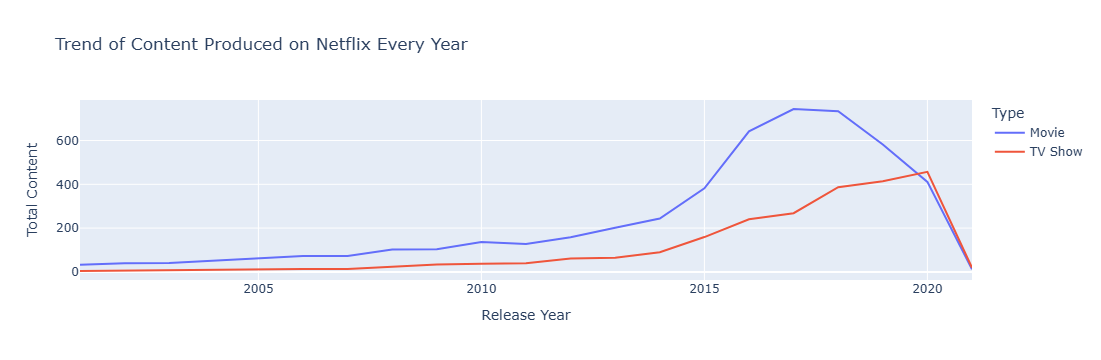

In [188]:
px.line(df2,x='Release Year',y='Total Content',color='Type',title='Trend of Content Produced on Netflix Every Year')

## Top Country For Movies and TV Shows

In [191]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Name not specified,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [195]:
df3=df[['type','country']]
df3.head()

,type,country
0,TV Show,Brazil
1,Movie,Mexico
2,Movie,Singapore
3,Movie,United States
4,Movie,United States


In [201]:
df3['country']=df3['country'].fillna('Country Not Specified')

C:\Users\arshi\AppData\Local\Temp\ipykernel_14276\3804370576.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [205]:
df3.head()

,type,country
0,TV Show,Brazil
1,Movie,Mexico
2,Movie,Singapore
3,Movie,United States
4,Movie,United States


In [207]:
df3=df3.rename(columns={'type':'Type','country':'Country'})
df3.head()

,Type,Country
0,TV Show,Brazil
1,Movie,Mexico
2,Movie,Singapore
3,Movie,United States
4,Movie,United States


In [209]:
grouped=df3.groupby(['Type','Country']).size().reset_index(name='Total Count')

In [211]:
grouped.sort_values('Total Count',ascending=False,inplace=True)
grouped.reset_index().drop('index',axis=1)

,Type,Country,Total Count
0,Movie,United States,1850
1,Movie,India,852
2,TV Show,United States,705
3,TV Show,Country Not Specified,277
4,Movie,Country Not Specified,230
...,...,...,...
770,Movie,"France, Canada, United States",1
771,Movie,"Argentina, Brazil, France, Poland, Germany, De...",1
772,Movie,"Thailand, China, United States",1
773,Movie,"Thailand, Canada, United States",1


In [213]:
df4=grouped.groupby('Type')

In [215]:
dfs={category: data for category, data in df4}

In [217]:
df_Movie=dfs['Movie']
df_TV_Show=dfs['TV Show']

In [219]:
Top_5_Country_Movie=df_Movie.head()

In [221]:
Top_5_Country_TVShow=df_TV_Show.head()

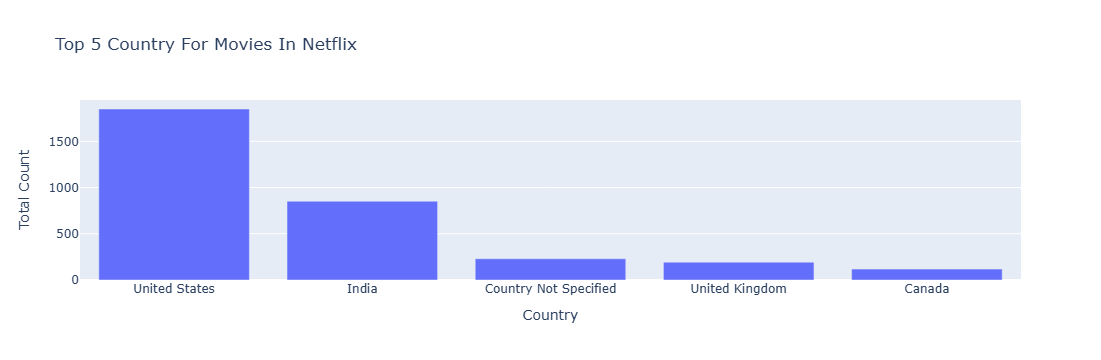

In [223]:
px.bar(Top_5_Country_Movie,x='Country',y='Total Count',title='Top 5 Country For Movies In Netflix')

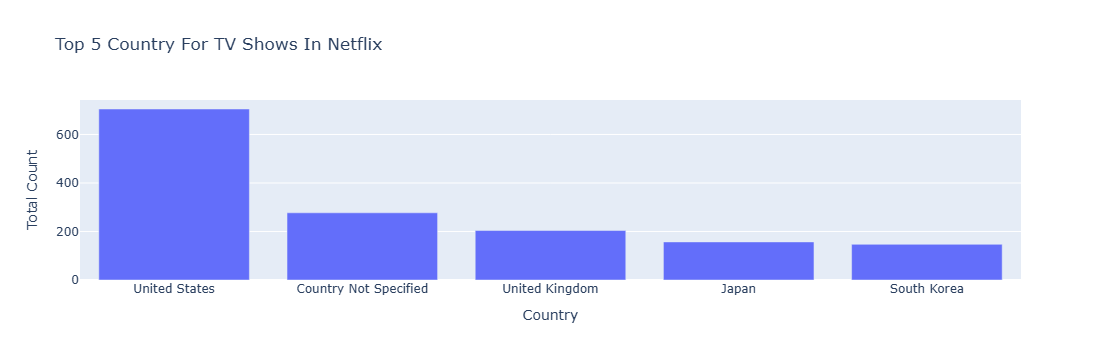

In [225]:
px.bar(Top_5_Country_TVShow,x='Country',y='Total Count',title='Top 5 Country For TV Shows In Netflix')